https://www.nltk.org/api/nltk.html

https://drive.google.com/drive/folders/1Yd5QrSk3dVjtb5l7OZuGlhUe1gwgK2y3?usp=sharing

In [ ]:
from nltk.corpus.reader import PlaintextCorpusReader


In [ ]:
 from google.colab import drive
import sys


drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
root = '/content/drive/MyDrive/varios/estenograficas/'


In [ ]:
mananeras=PlaintextCorpusReader(root,'.*')

In [ ]:
print(type(mananeras))

<class 'nltk.corpus.reader.plaintext.PlaintextCorpusReader'>


In [ ]:
mananeras.fileids()

['2018-12-07',
 '2018-12-10',
 '2018-12-11',
 '2018-12-12',
 '2018-12-15',
 '2018-12-17',
 '2018-12-18',
 '2018-12-19',
 '2018-12-22',
 '2018-12-23',
 '2018-12-24',
 '2018-12-26',
 '2018-12-27',
 '2018-12-28',
 '2018-12-29',
 '2019-01-02',
 '2019-01-03',
 '2019-01-03-2da',
 '2019-01-04',
 '2019-01-07',
 '2019-01-08',
 '2019-01-09',
 '2019-01-09-2da',
 '2019-01-10',
 '2019-01-11',
 '2019-01-11-2da',
 '2019-01-12',
 '2019-01-14',
 '2019-01-15',
 '2019-01-16',
 '2019-01-17',
 '2019-01-18',
 '2019-01-19',
 '2019-01-19-2da',
 '2019-01-20',
 '2019-01-21',
 '2019-01-22',
 '2019-01-23',
 '2019-01-24',
 '2019-01-25',
 '2019-01-28',
 '2019-01-29',
 '2019-01-30',
 '2019-01-31',
 '2019-02-01',
 '2019-02-04',
 '2019-02-05',
 '2019-02-06',
 '2019-02-07',
 '2019-02-08',
 '2019-02-11',
 '2019-02-12',
 '2019-02-13',
 '2019-02-14',
 '2019-02-15',
 '2019-02-18',
 '2019-02-19',
 '2019-02-20',
 '2019-02-21',
 '2019-02-22',
 '2019-02-25',
 '2019-02-26',
 '2019-02-27',
 '2019-02-28',
 '2019-03-01',
 '2019-03

In [ ]:
len(mananeras.words())

6060318

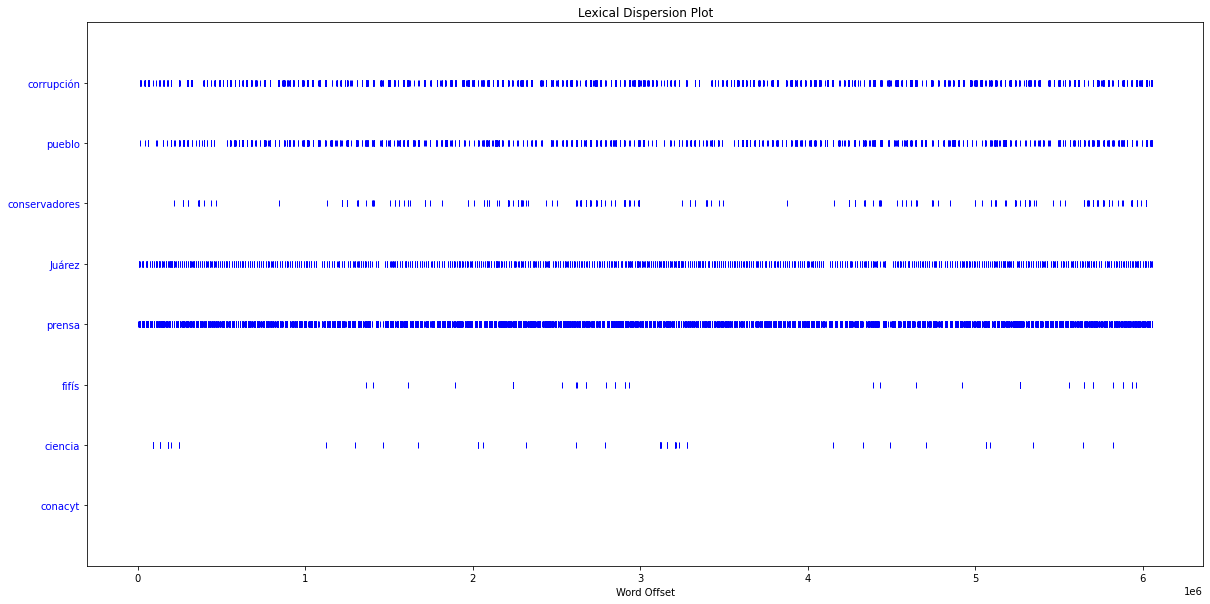

In [ ]:
import matplotlib.pyplot as plt
from nltk import Text,ConditionalFreqDist
plt.figure(figsize=(20,10))
Text(mananeras.words()).dispersion_plot(['corrupción','pueblo','conservadores','Juárez','prensa','fifís','ciencia','conacyt'])

In [ ]:
from nltk.probability import FreqDist
fdist = FreqDist(Text(mananeras.words()))
top_ten = fdist.most_common(2000)
print(top_ten)

[('-', 475322), ('.', 221812), ('="', 182902), (',', 178936), ('>', 142168), ('/', 137212), ('<', 116878), ('a', 116048), ('de', 107294), ('p', 106462), (':', 76456), ('menu', 73302), ('item', 69138), ('que', 62838), ('</', 61530), ('"', 56964), ('class', 56478), ('la', 55258), ('text', 53548), ('https', 43842), ('en', 42782), ('style', 42608), ('://', 41922), ('org', 41300), ('li', 40934), ('mx', 40684), ('.</', 40458), ('lopezobrador', 40442), ("='", 37450), ("'", 37018), ('el', 36522), ('align', 36388), ('justify', 34850), ('href', 34660), ('y', 32456), ('type', 32290), ('></', 30284), ('se', 30174), ('=', 27364), ('">', 26254), ('"><', 25138), (';', 25094), ('div', 24968), (';">', 24820), ('los', 24082), ('span', 23950), ('":"', 22684), ('strong', 21080), ('","', 20544), ('no', 20500), ('es', 20170), ('del', 18696), ('css', 18618), ('1', 18466), ('mejs', 18190), ('><', 17662), ('wp', 17604), ('post', 17128), ('/">', 16154), ('para', 15556), ('script', 15358), ('2019', 15238), ('con

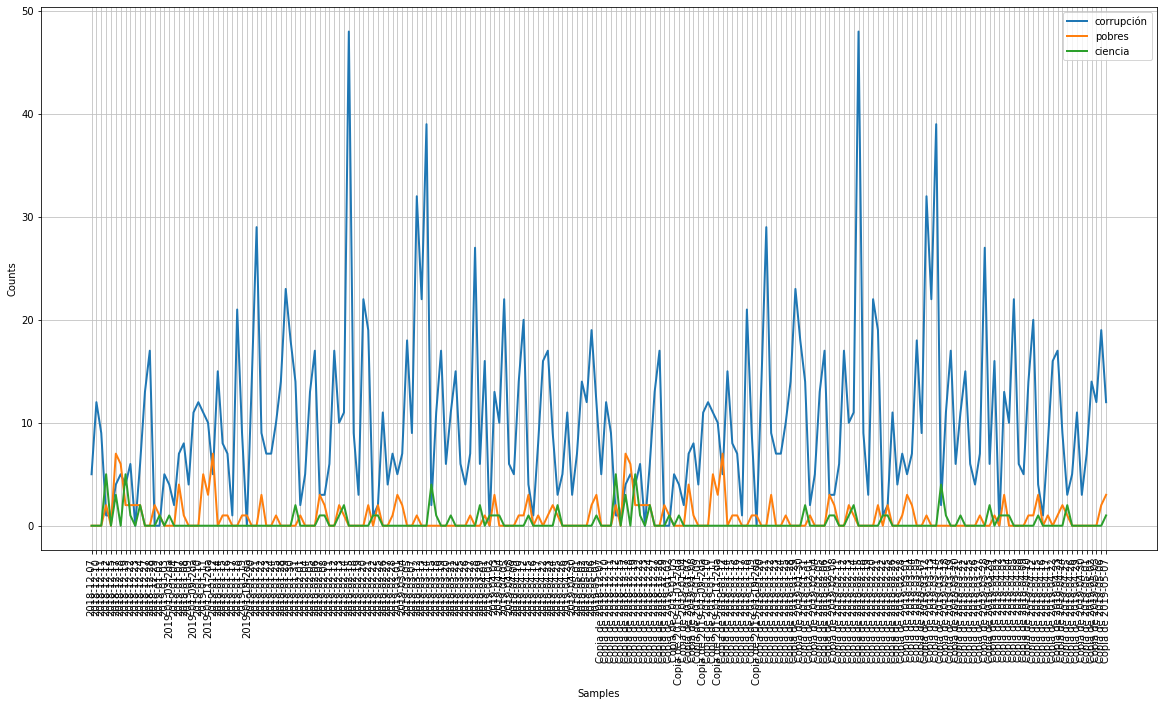

In [ ]:

plt.figure(figsize=(20,10))

cfd=ConditionalFreqDist((target,fileid[:])
    for fileid in mananeras.fileids()
                             for w in mananeras.words(fileid)
    for target in ['ciencia','corrupción','pobres']
                             if w.lower().startswith(target))
cfd.plot()

In [ ]:
mananeras

<PlaintextCorpusReader in '/content/drive/MyDrive/varios/estenograficas'>

https://radimrehurek.com/gensim/

In [ ]:
from gensim.models import word2vec

In [ ]:
from nltk.corpus import brown
from gensim.models import Word2Vec

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True


---



In [ ]:
model_wv = Word2Vec(mananeras.sents(), size=100, window=20, min_count=2, workers=4)
model_wv.wv['ciencia']

KeyboardInterrupt: ignored

In [ ]:
model_wv.save('model_wv.word2vec')


## Hagamos un ejemplo

https://www.kaggle.com/competitions/jigsaw-toxic-comment-classification-challenge/overview

Se le proporciona un gran número de comentarios de Wikipedia que han sido etiquetados por calificadores humanos por su comportamiento tóxico. Los tipos de toxicidad son

- tóxico
- tóxico_grave
- obsceno
- amenaza
- insulto
- odio_de_identidad

Debe crear un modelo que prediga una probabilidad de cada tipo de toxicidad para cada comentario.

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [ ]:
path = '/content/drive/MyDrive/varios/toxic/'


In [ ]:
train_data = path + 'train.csv'
test_data = path + 'test.csv'

In [ ]:
train_df = pd.read_csv(train_data)
test_df = pd.read_csv(test_data)

In [ ]:
print(len(train_df), len(test_df))

159571 153164


In [ ]:
train_df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


### Preprocesamos

Tokens

In [ ]:
from nltk.tokenize import WordPunctTokenizer
tokenizer = WordPunctTokenizer()
st = 'El arbol está...'
tokenizer.tokenize(st)

['El', 'arbol', 'está', '...']

Contadores

In [ ]:
import collections

print(collections.Counter(['a', 'b', 'c', 'a', 'b', 'b']))

Counter({'b': 3, 'a': 2, 'c': 1})


Expresiones regulares

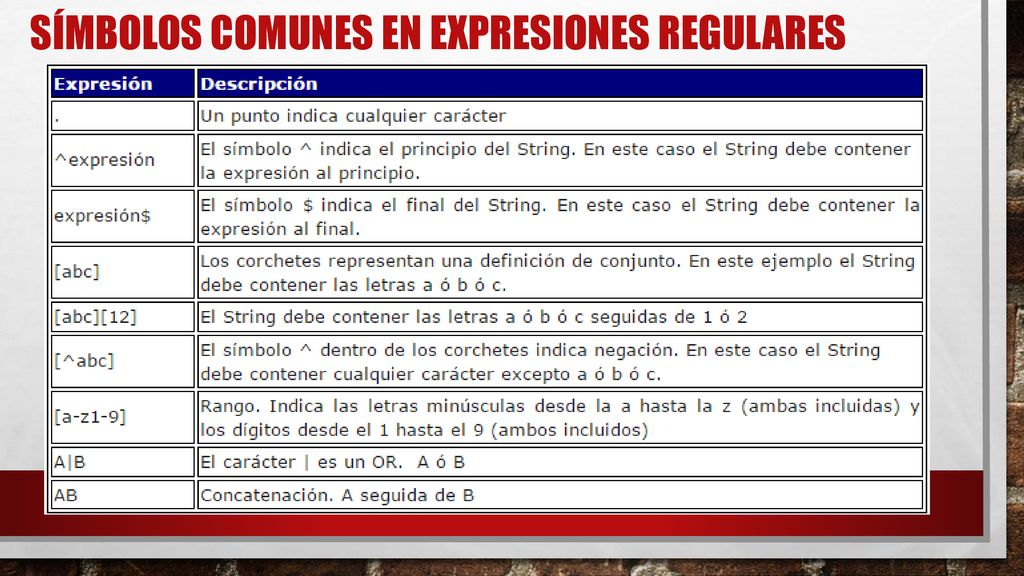

In [ ]:
print('Processing text dataset')
from nltk.tokenize import WordPunctTokenizer
from collections import Counter
from string import punctuation, ascii_lowercase
import regex as re
from tqdm import tqdm

re_url = re.compile(r"((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\
                    .([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*",
                    re.MULTILINE|re.UNICODE)
re_ip = re.compile("\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}")

# setup tokenizer
tokenizer = WordPunctTokenizer()
vocab = Counter()

def text_to_wordlist(text, lower=False):
    text = re_url.sub("URL", text)
    text = re_ip.sub("IPADDRESS", text)
    
    # Tokenize
    text = tokenizer.tokenize(text)
    
    # optional: lower case
    if lower:
        text = [t.lower() for t in text]
    
    # Return a list of words
    vocab.update(text)
    return text

def process_comments(list_sentences, lower=False):
    comments = []
    for text in tqdm(list_sentences):
        txt = text_to_wordlist(text, lower=lower)
        comments.append(txt)
    return comments


list_sentences_train = list(train_df["comment_text"].fillna("palabra_desconocida").values)
list_sentences_test = list(test_df["comment_text"].fillna("palabra_desconocida").values)

comments = process_comments(list_sentences_train + list_sentences_test, lower=True)

Processing text dataset


100%|██████████| 312735/312735 [00:16<00:00, 19444.90it/s]


In [ ]:
from gensim.models import Word2Vec

model = Word2Vec(comments, size=100, window=5, min_count=5, workers=16, sg=0, negative=5)


In [ ]:
word_vectors = model.wv


In [ ]:
print("Number of word vectors: {}".format(len(word_vectors.vocab)))


Number of word vectors: 70056


In [ ]:
model.wv.most_similar_cosmul(positive=['woman', 'king'], negative=['man'])


[('princess', 0.9752877354621887),
 ('queen', 0.9715092778205872),
 ('prince', 0.967994749546051),
 ('mary', 0.9648910164833069),
 ('bishop', 0.9490305781364441),
 ('duchess', 0.9426259398460388),
 ('mayor', 0.9250414371490479),
 ('duke', 0.9228076934814453),
 ('tribe', 0.916522741317749),
 ('emperor', 0.9114937782287598)]

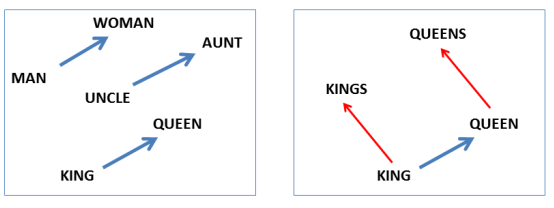

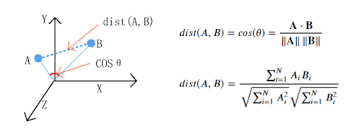

In [ ]:
print(len(word_vectors.vocab))
MAX_NB_WORDS = len(word_vectors.vocab)
MAX_SEQUENCE_LENGTH = 200


70056


In [ ]:
from keras.preprocessing.sequence import pad_sequences

word_index = {t[0]: i+1 for i,t in enumerate(vocab.most_common(MAX_NB_WORDS))}
sequences = [[word_index.get(t, 0) for t in comment]
             for comment in comments[:len(list_sentences_train)]]
test_sequences = [[word_index.get(t, 0)  for t in comment] 
                  for comment in comments[len(list_sentences_train):]]

# pad
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH, 
                     padding="pre", truncating="post")
list_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
y = train_df[list_classes].values
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', y.shape)

test_data = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding="pre",
                          truncating="post")
print('Shape of test_data tensor:', test_data.shape)


Shape of data tensor: (159571, 200)
Shape of label tensor: (159571, 6)
Shape of test_data tensor: (153164, 200)


## Creamos una matriz de "embeddings"

In [ ]:
WV_DIM = 100
nb_words = MAX_NB_WORDS
print(nb_words)
# we initialize the matrix with random numbers
wv_matrix = (np.random.rand(nb_words, WV_DIM) )
for word, i in word_index.items():
    if i >= MAX_NB_WORDS:
        continue
    try:
        embedding_vector = word_vectors[word]
        # words not found in embedding index will be all-zeros.
        wv_matrix[i] = embedding_vector
    except:
        pass    

   
print(wv_matrix.shape)
print(wv_matrix)

70056
(70056, 100)
[[ 2.42372469e-01  6.67056954e-01  5.87733178e-01 ...  2.11190648e-01
   5.26303897e-01  7.23506712e-01]
 [-1.00923133e+00 -5.96555114e-01 -1.32740712e+00 ...  9.08839345e-01
   1.70214927e+00  2.01824355e+00]
 [-1.91075337e+00  1.42005312e+00 -1.00922132e+00 ...  2.52269179e-01
   1.00838590e+00  2.08886576e+00]
 ...
 [ 2.25183424e-02  7.59807751e-02 -5.45059284e-03 ... -4.29571461e-04
  -1.06652141e-01 -7.94736519e-02]
 [ 4.15187702e-03  6.13265857e-02  2.68887007e-03 ... -1.22984359e-02
  -1.22932777e-01 -1.41782805e-01]
 [ 6.62999600e-02  1.06443636e-01 -3.79078239e-02 ... -8.15079436e-02
  -1.29466251e-01  1.29305897e-02]]


In [ ]:
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout,SpatialDropout1D, Bidirectional#CuDNNLSTM
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization


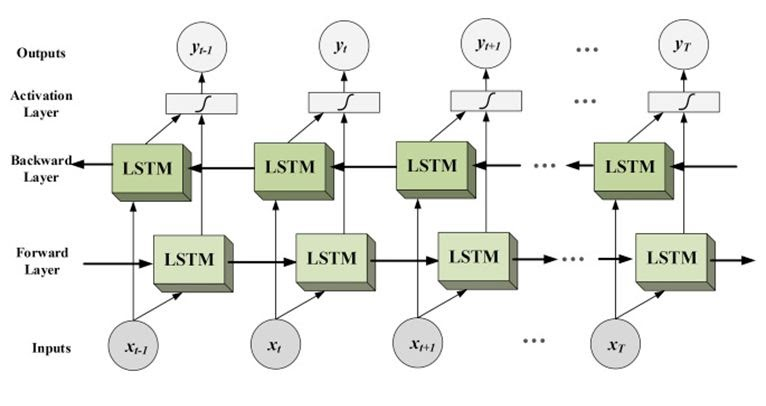

In [ ]:
wv_layer = Embedding(nb_words,
                     WV_DIM,
                     mask_zero=False,
                     weights=[wv_matrix],
                     input_length=MAX_SEQUENCE_LENGTH,
                     trainable=False)

# Inputs
comment_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = wv_layer(comment_input)

# biGRU
embedded_sequences = SpatialDropout1D(0.2)(embedded_sequences)
x = Bidirectional(LSTM(64, return_sequences=False))(embedded_sequences)

# Output
x = Dropout(0.2)(x)
x = BatchNormalization()(x)
preds = Dense(6, activation='sigmoid')(x)

# build the model
model = Model(inputs=[comment_input], outputs=preds)
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001, clipnorm=.25, beta_1=0.7, beta_2=0.99),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
hist = model.fit([data], y, validation_split=0.1, epochs=100, batch_size=256, shuffle=True)

Epoch 1/100
561/561 [==============================] - 17s 30ms/step - loss: 3.0013 - accuracy: 0.2226 - val_loss: 0.8498 - val_accuracy: 0.1103
Epoch 2/100
561/561 [==============================] - 16s 28ms/step - loss: 3.3666 - accuracy: 0.2026 - val_loss: 0.8470 - val_accuracy: 0.0820
Epoch 3/100
561/561 [==============================] - 16s 28ms/step - loss: 3.6917 - accuracy: 0.1887 - val_loss: 0.8991 - val_accuracy: 0.1240
Epoch 4/100
561/561 [==============================] - 15s 27ms/step - loss: 3.9528 - accuracy: 0.1801 - val_loss: 0.9043 - val_accuracy: 0.1396
Epoch 5/100
561/561 [==============================] - 15s 28ms/step - loss: 4.1663 - accuracy: 0.1785 - val_loss: 0.9706 - val_accuracy: 0.0981
Epoch 6/100
561/561 [==============================] - 16s 28ms/step - loss: 4.4343 - accuracy: 0.1771 - val_loss: 1.0230 - val_accuracy: 0.0892
Epoch 7/100
561/561 [==============================] - 16s 28ms/step - loss: 4.6926 - accuracy: 0.1752 - val_loss: 1.0667 - val_ac

# La atención y los transformers

Son capaces ya de resumir libros completos:

"Alicia cae en una madriguera y crece hasta alcanzar un tamaño gigantesco tras beber una misteriosa botella. Decide concentrarse en volver a su tamaño normal y encontrar el camino hacia el jardín. Se encuentra con la Oruga, que le dice que un lado de la seta la hará crecer más alto y el otro más bajo. Se come la seta y vuelve a su tamaño normal. Alicia asiste a una fiesta con el Sombrerero Loco y la Liebre de Marzo. La Reina llega y ordena la ejecución de los jardineros por haberse equivocado con las rosas. Alicia las salva poniéndolas en una maceta. El Rey y la Reina de Corazones presiden un juicio. La Reina se enfada y ordena que Alicia sea condenada a muerte. Alicia se despierta y encuentra a su hermana a su lado" - Alicia en el País de las Maravilla (26.449 palabras).

Redes famosas

https://venturebeat.com/2020/06/01/ai-machine-learning-openai-gpt-3-size-isnt-everything/

## Están basados en modulos de atención

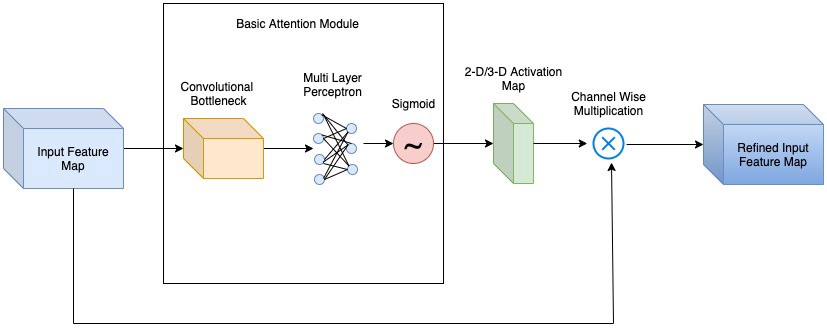

## Modulos de atención

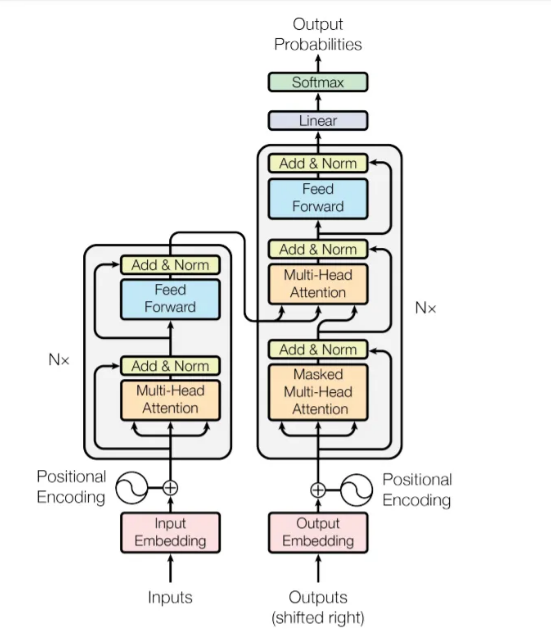

## Autoatención

Un módulo de autoatención funciona comparando cada palabra de la frase con todas las demás, incluida ella misma, y volviendo a ponderar las incrustaciones de cada palabra para incluir la relevancia contextual.

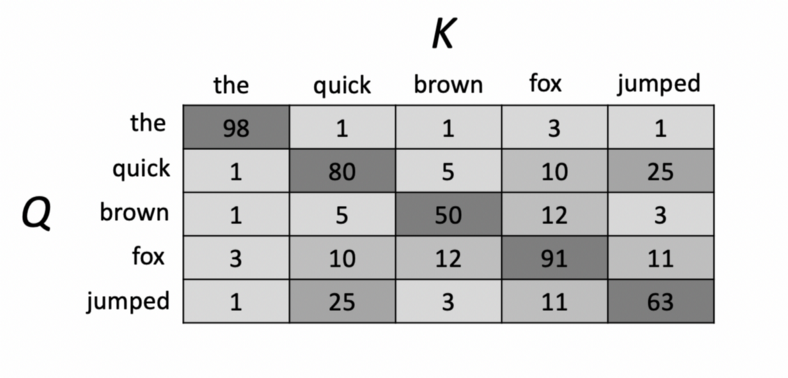

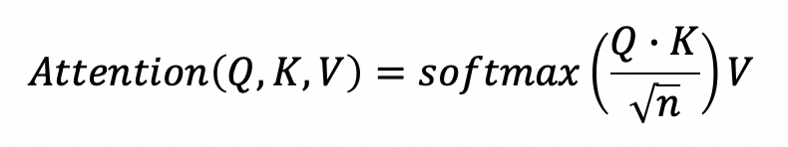

## Atención "Multihead"

Un bloque de atención multicabezal es esencialmente lo mismo que un bloque de autoatención normal, pero en lugar de un solo bloque de atención, el bloque de atención multicabezal contendrá múltiples bloques de autoatención que operan en paralelo. Estos bloques de autoatención no compartirán ninguna ponderación; lo único que compartirán es la misma incrustación de palabras de entrada. El número de bloques de autoatención en un bloque de atención multicabezal es un hiperparámetro del modelo. 

## El codificador

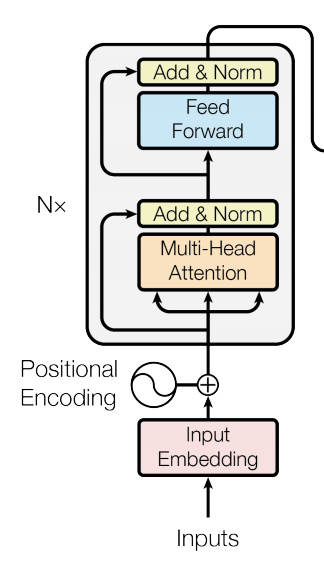

## El decodificador

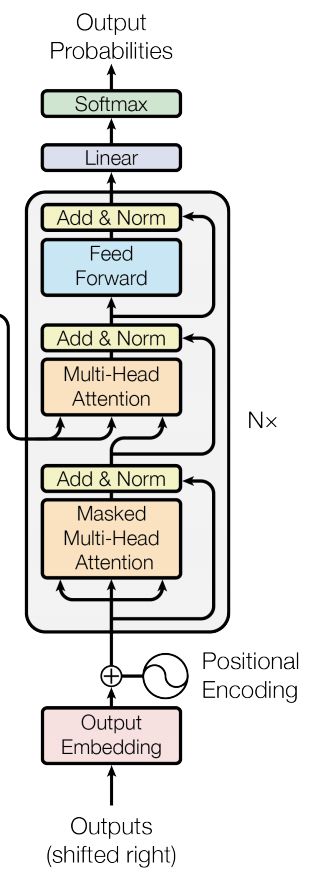

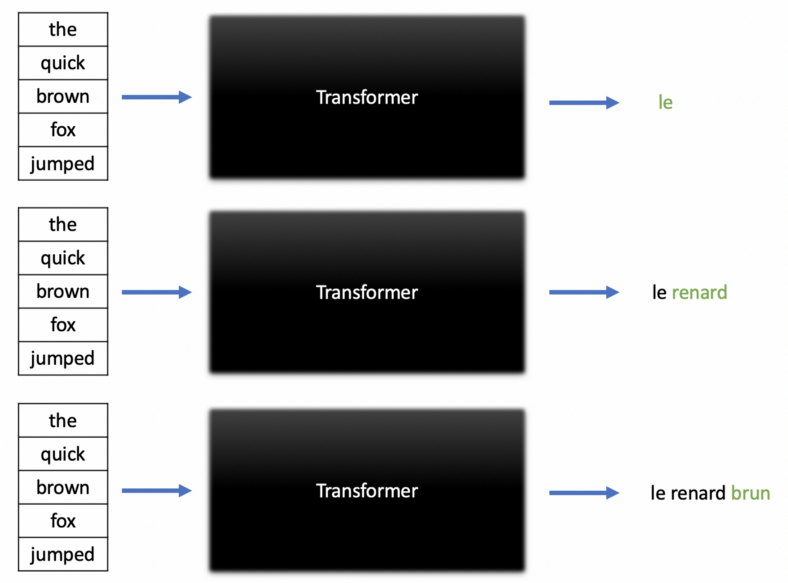

In [ ]:
## En 

## En imágenes

https://arxiv.org/pdf/1706.03762.pdf

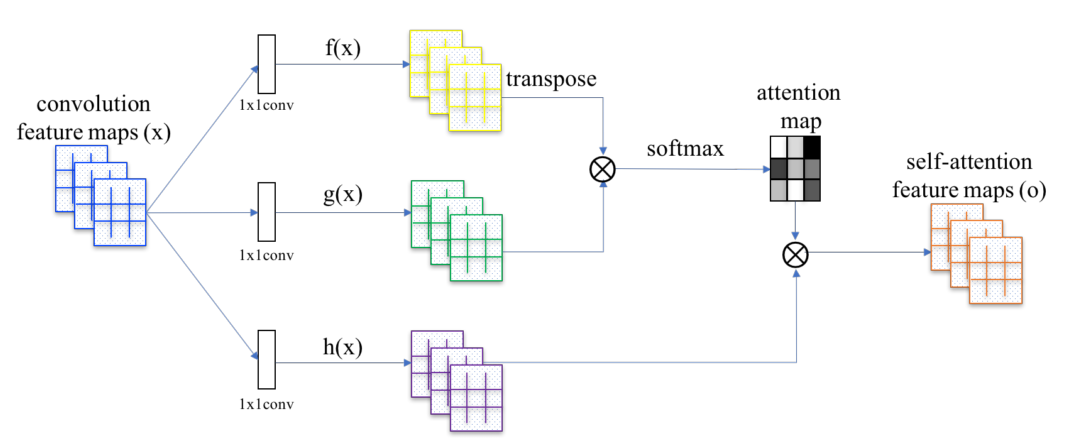

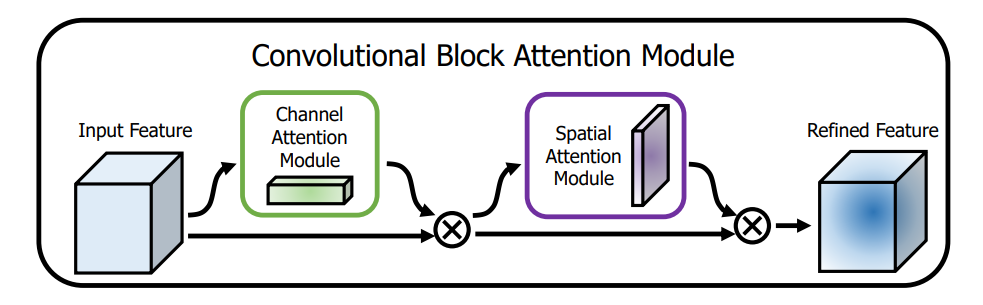

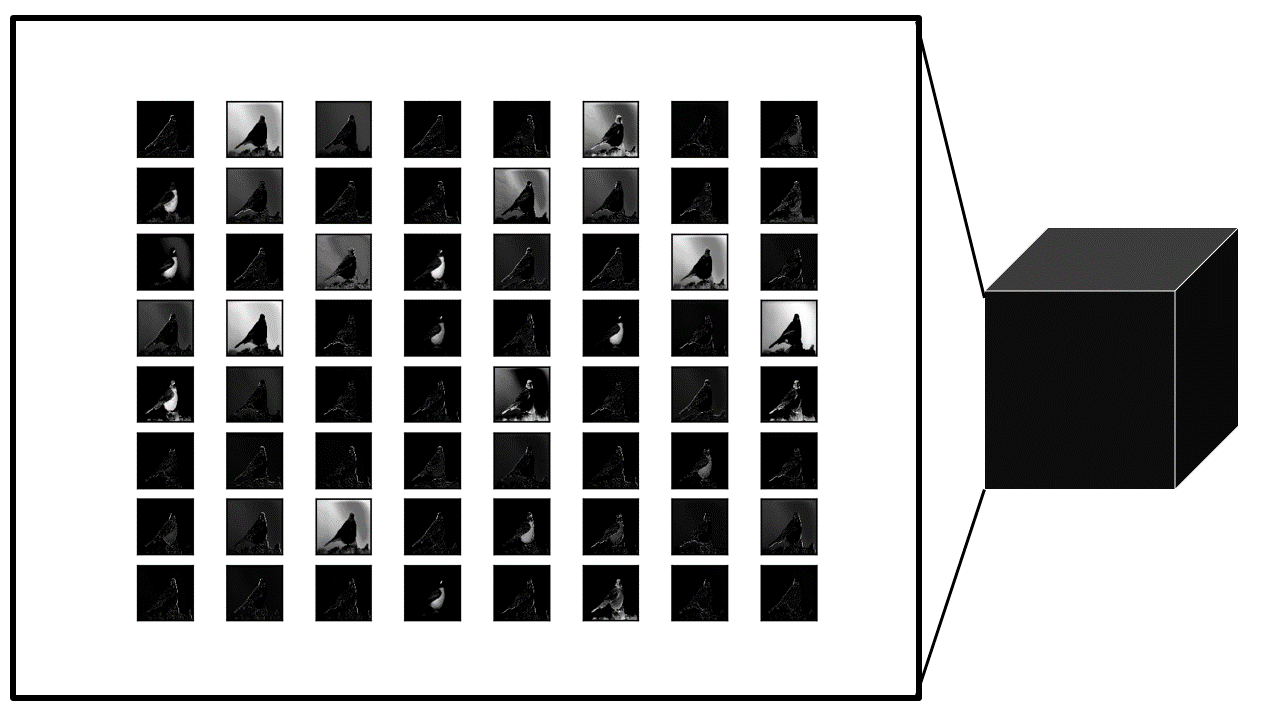

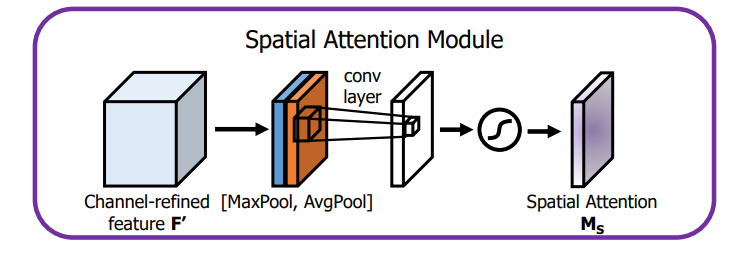

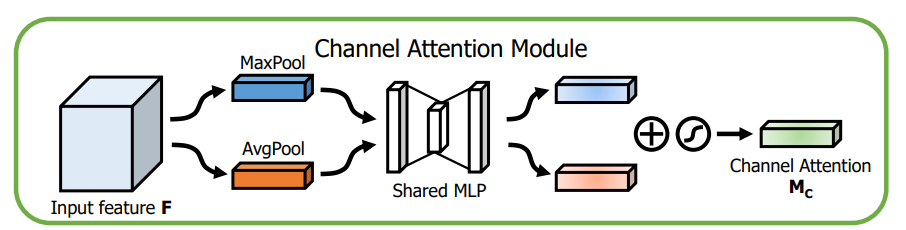

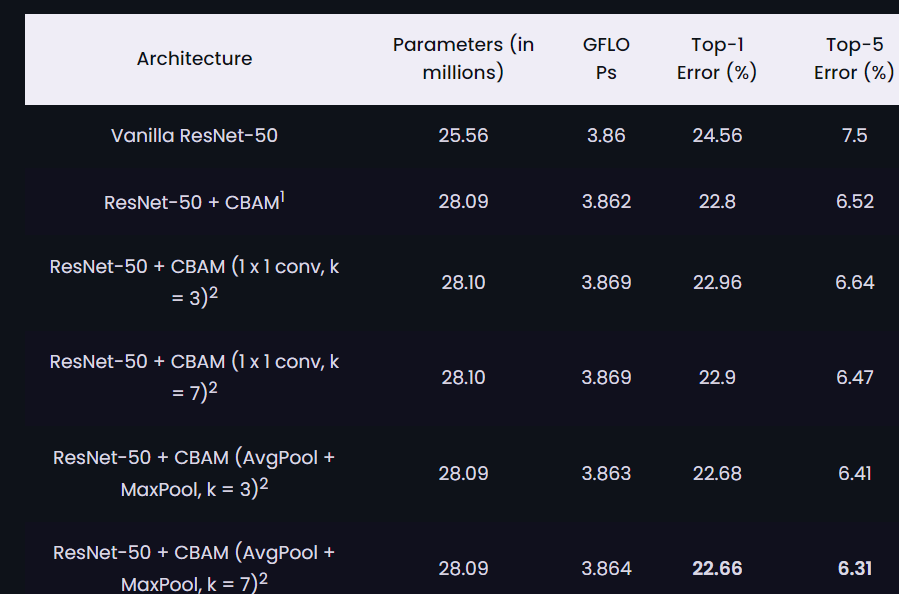

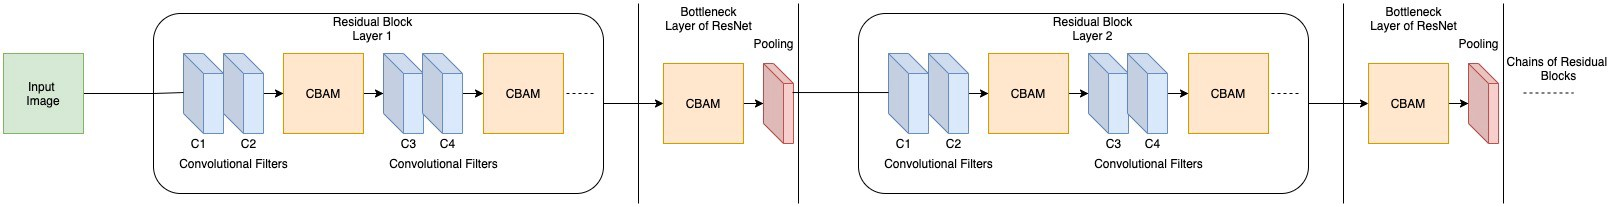

In [ ]:
https://keras.io/examples/timeseries/timeseries_transformer_classification/

https://keras.io/examples/timeseries/timeseries_transformer_classification/

# Eso es todo muchas gracias!